<a href="https://colab.research.google.com/github/Sukantanath108/Brainwave_Matrix_Intern/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
# Display all the columns previously hidden
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.shape

(284807, 31)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
# Check missing values in the dataset
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df["Amount"] = sc.fit_transform(df["Amount"].values.reshape(-1,1))

In [31]:
# Amount column is standarized
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [35]:
df = df.drop("Time",axis=1)
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [36]:
df.duplicated().any() #checking duplicate values

True

In [37]:
df = df.drop_duplicates()

In [38]:
df.shape

(275663, 30)

In [39]:
df['Class'].value_counts()

,count
Class,
0,275190
1,473


<Axes: xlabel='Class'>

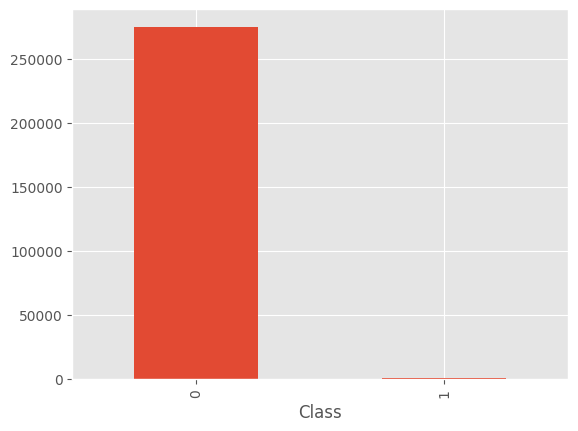

In [40]:
%matplotlib inline
plt.style.use('ggplot')
df['Class'].value_counts().plot(kind='bar')

**This shows a highly imbalanced dataset**

In [41]:
X = df.drop("Class",axis = 1)
y = df["Class"]

In [42]:
print(X.shape)
print(y.shape)

(275663, 29)
(275663,)


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((220530, 29), (55133, 29), (220530,), (55133,))

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [46]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
   #"Random Forest": RandomForestClassifier() you can use this too...takes time for training
}

for name,clf in classifier.items():
    print(f"\n =========== {name} ============")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print(f"Accuracy Score: {score}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"f1_score : {f1_score(y_test,y_pred)}")


 =========== Logistic Regression ============
Accuracy Score: 0.9990749641775343
Precision Score: 0.8688524590163934
Recall Score: 0.5520833333333334
f1_score : 0.6751592356687898

 =========== Decision Tree ============
Accuracy Score: 0.9991112400921408
Precision Score: 0.7640449438202247
Recall Score: 0.7083333333333334
f1_score : 0.7351351351351352


 Here the f1,recall & precsion score are almost same for decision tree classifier but not for logistic regression. This is happening beacuse of  *"imbalanced data"* present in the dataset

In [47]:
'''
now we balance the datasets.
1) undersampling
2) oversampling
3) SMOTE

using undersampling here would be bad as we are losing data.
'''

'\nnow we balance the datasets.\n1) undersampling\n2) oversampling\n3) SMOTE\n\nusing undersampling here would be bad as we are losing data.\n'

In [48]:
#Undersampling

normal = df[df['Class']==0]
fraud = df[df['Class']==1]
normal.shape,fraud.shape

((275190, 30), (473, 30))

In [49]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

In [53]:
mix_df = pd.concat([normal_sample,fraud],ignore_index=True) #removes the index
mix_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.322603,0.397147,0.320365,0.620152,0.072907,-0.447264,0.005158,-0.277421,1.267757,-0.458362,0.116613,-1.993951,2.892174,1.466406,0.269000,0.481008,-0.040655,-0.092346,-0.011535,-0.058341,-0.453869,-1.020428,0.034947,-0.500146,0.332909,0.105326,-0.051757,0.005833,-0.345313,0
1,-1.313695,2.061536,1.624120,2.784722,-0.401391,0.861516,-1.111684,-1.948637,-1.928709,-0.181147,-0.602849,-0.391590,-0.838687,1.158701,1.599633,0.115160,0.628146,-0.382055,0.417011,0.592025,-1.428672,-0.297798,0.235101,-0.019045,-0.283006,-0.025799,-0.063410,0.065145,-0.350191,0
2,-2.091027,1.249032,0.841086,-0.777488,-0.176500,-0.077257,-0.118603,-0.256751,0.178740,-0.000305,0.991856,0.698911,-0.901970,0.341906,-0.643972,-0.011763,-0.069715,-0.449297,-0.255400,-0.517288,0.631502,-0.413265,0.293367,-0.000012,-0.318688,0.224045,-0.725597,-0.392266,-0.349231,0
3,-0.517403,-0.012256,1.978650,-0.948333,-0.403861,0.451018,-0.397741,0.442495,-1.615385,0.453070,1.601169,-1.096272,-1.838873,0.448491,1.236912,0.430491,1.058529,-1.456398,1.380541,0.156915,0.061940,-0.054757,-0.028856,-0.356647,-0.217367,-0.252164,0.088755,0.060903,-0.303813,0
4,-0.967264,0.235881,2.145346,0.316625,0.713526,-0.803309,0.708918,-0.202682,0.021606,-0.659890,-0.799660,0.408330,0.255857,-0.478712,-0.815845,-0.222251,-0.450916,-0.513921,-0.507535,0.123615,-0.172405,-0.408534,-0.050521,0.371916,0.154051,-0.732000,-0.082532,-0.096762,-0.235966,0


In [54]:
mix_df.shape

(946, 30)

In [55]:
mix_df['Class'].value_counts()


,count
Class,
0,473
1,473


In [56]:
X = mix_df.drop("Class",axis = 1)
y = mix_df["Class"]

In [57]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
   #"Random Forest": RandomForestClassifier() you can use this too...takes time for training
}

for name,clf in classifier.items():
    print(f"\n =========== {name} ============")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print(f"Accuracy Score: {score}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"f1_score : {f1_score(y_test,y_pred)}")


 =========== Logistic Regression ============
Accuracy Score: 0.9368421052631579
Precision Score: 0.9560439560439561
Recall Score: 0.9157894736842105
f1_score : 0.9354838709677419

 =========== Decision Tree ============
Accuracy Score: 0.8894736842105263
Precision Score: 0.8936170212765957
Recall Score: 0.8842105263157894
f1_score : 0.8888888888888888


 Now we can see using undersampling our scores are almost close to each other besides the accuracy metrics

In [60]:
#oversampling
X = df.drop("Class",axis = 1)
y = df["Class"]
X.shape , y.shape

((275663, 29), (275663,))

In [62]:
#using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res , y_res = sm.fit_resample(X,y)
X_res.shape , y_res.shape

((550380, 29), (550380,))

In [63]:
y_res.value_counts() #newly generated equal amount of samples

,count
Class,
0,275190
1,275190


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)

In [65]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
   #"Random Forest": RandomForestClassifier() you can use this too...takes time for training
}

for name,clf in classifier.items():
    print(f"\n =========== {name} ============")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print(f"Accuracy Score: {score}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"f1_score : {f1_score(y_test,y_pred)}")


 =========== Logistic Regression ============
Accuracy Score: 0.9446019114066645
Precision Score: 0.9728283959677108
Recall Score: 0.9148113173282969
f1_score : 0.9429282719377059

 =========== Decision Tree ============
Accuracy Score: 0.9979922962316945
Precision Score: 0.9971897380110597
Recall Score: 0.9988014382740711
f1_score : 0.9979949374438628


Now we can see all the metrics are almost identical which means our model is successful

In [67]:
dt = DecisionTreeClassifier()
dt.fit(X_res,y_res)

DecisionTreeClassifier()

# Now we are saving the model

In [68]:
import joblib
joblib.dump(dt,'credit_card_fraud_detection_model.pkl')

['credit_card_fraud_detection_model.pkl']

In [69]:
model = joblib.load('credit_card_fraud_detection_model.pkl')

In [70]:
predict = model.predict([[-0.517403,-0.012256,	1.978650,	-0.948333	,-0.403861	,0.451018,	-0.397741,	0.442495,	-1.615385,	0.453070,	1.601169,	-1.096272,	-1.838873	,0.448491,	1.236912,	0.430491,	1.058529,	-1.456398,	1.380541,	0.156915,	0.061940,	-0.054757,	-0.028856,	-0.356647,	-0.217367,	-0.252164,	0.088755,	0.060903,	-0.303813]])

In [71]:
if predict == 0:
    print("Transaction is legit (normal) \n")
else:
    print("Transaction is fraud \n")

Transaction is legit (normal) 

